<a href="https://colab.research.google.com/github/vinayakkgarg/HybridLSTM_For_NIFTY_predictions/blob/main/_20_STI_global_ind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THIS FILE CONSISTS PADDED NaNs with 20 years of data and all features included

## 1. Importing the libraries

In [ ]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 2. Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/stockDataset-Daily-20yrs
!ls
!rm -rf ./new_df.csv

/content/gdrive/My Drive/stockDataset-Daily-20yrs
dax.csv  ftse.csv   nasdaq.csv	snp.csv       twse.csv
dji.csv  hsi.csv    nifty.csv	sti.csv       us_10.csv
dxy.csv  kospi.csv  nikkei.csv	tech-ind.csv  usdinr.csv


In [ ]:
pd.read_csv('./tech-ind.csv')

,Unnamed: 0,Date,Close,High,Low,Open,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,0,03 Jan 2000,1592.20,1592.90,1482.15,1482.15,0.000000,1.000000,110.75,110.05,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1592.200000,1592.200000,0.000000,0.000000,0.000000,1592.200000,1591.20
1,1,04 Jan 2000,1638.70,1641.95,1594.40,1594.40,0.029205,1.029205,47.55,44.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1616.344231,1617.387500,1.043269,0.000000,0.000000,1627.075000,1637.70
2,2,05 Jan 2000,1595.80,1635.50,1555.05,1634.55,-0.026179,1.002261,80.45,-38.75,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1608.962888,1608.961894,-0.000994,0.000000,0.000000,1605.423077,1594.80
3,3,06 Jan 2000,1617.60,1639.00,1595.80,1595.80,0.013661,1.015953,43.20,21.80,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.377447,1611.688606,0.311159,0.000000,0.000000,1613.642500,1616.60
4,4,07 Jan 2000,1613.30,1628.25,1597.20,1616.60,-0.002658,1.013252,31.05,-3.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.823295,1612.126416,0.303121,0.000000,0.000000,1613.413223,1612.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,5288,05 Apr 2021,14637.80,14849.85,14459.50,14837.70,-0.015440,9.193443,390.35,-199.90,14663.775,14786.559,12697.13850,47.189889,14631.792857,14826.742857,14763.131021,14719.366878,-43.764142,15297.678945,14355.806769,14695.902317,14636.80
5289,5289,06 Apr 2021,14683.50,14779.10,14573.90,14737.00,0.003122,9.222145,205.20,-53.50,14671.770,14788.892,12719.86925,48.256235,14650.950000,14799.976190,14757.232426,14713.848897,-43.383529,15233.320318,14366.632063,14687.634106,14682.50
5290,5290,07 Apr 2021,14819.05,14879.80,14649.85,14716.45,0.009231,9.307279,229.95,102.60,14665.720,14789.668,12742.06475,51.391409,14721.542857,14787.514286,14761.811506,14730.033682,-31.777824,15201.568451,14373.460120,14775.244702,14818.05
5291,5291,08 Apr 2021,14873.80,14984.15,14821.10,14875.65,0.003695,9.341666,163.05,-1.85,14673.985,14794.242,12764.60400,52.639621,14773.900000,14784.452381,14770.106950,14752.151577,-17.955373,15194.763616,14374.141146,14840.948234,14872.80


Reading the names of all dataframes into a list

In [ ]:

list_of_dfs = []
for x in os.listdir():
  if(x=='tech-ind.csv'):
    tech_ind = pd.read_csv('./tech-ind.csv')
    continue
  list_of_dfs.append(x[:-4])

Storing all dataframes in a dictionary all_dfs

In [ ]:
tech_ind

,Unnamed: 0,Date,Close,High,Low,Open,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,0,03 Jan 2000,1592.20,1592.90,1482.15,1482.15,0.000000,1.000000,110.75,110.05,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1592.200000,1592.200000,0.000000,0.000000,0.000000,1592.200000,1591.20
1,1,04 Jan 2000,1638.70,1641.95,1594.40,1594.40,0.029205,1.029205,47.55,44.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1616.344231,1617.387500,1.043269,0.000000,0.000000,1627.075000,1637.70
2,2,05 Jan 2000,1595.80,1635.50,1555.05,1634.55,-0.026179,1.002261,80.45,-38.75,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1608.962888,1608.961894,-0.000994,0.000000,0.000000,1605.423077,1594.80
3,3,06 Jan 2000,1617.60,1639.00,1595.80,1595.80,0.013661,1.015953,43.20,21.80,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.377447,1611.688606,0.311159,0.000000,0.000000,1613.642500,1616.60
4,4,07 Jan 2000,1613.30,1628.25,1597.20,1616.60,-0.002658,1.013252,31.05,-3.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.823295,1612.126416,0.303121,0.000000,0.000000,1613.413223,1612.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,5288,05 Apr 2021,14637.80,14849.85,14459.50,14837.70,-0.015440,9.193443,390.35,-199.90,14663.775,14786.559,12697.13850,47.189889,14631.792857,14826.742857,14763.131021,14719.366878,-43.764142,15297.678945,14355.806769,14695.902317,14636.80
5289,5289,06 Apr 2021,14683.50,14779.10,14573.90,14737.00,0.003122,9.222145,205.20,-53.50,14671.770,14788.892,12719.86925,48.256235,14650.950000,14799.976190,14757.232426,14713.848897,-43.383529,15233.320318,14366.632063,14687.634106,14682.50
5290,5290,07 Apr 2021,14819.05,14879.80,14649.85,14716.45,0.009231,9.307279,229.95,102.60,14665.720,14789.668,12742.06475,51.391409,14721.542857,14787.514286,14761.811506,14730.033682,-31.777824,15201.568451,14373.460120,14775.244702,14818.05
5291,5291,08 Apr 2021,14873.80,14984.15,14821.10,14875.65,0.003695,9.341666,163.05,-1.85,14673.985,14794.242,12764.60400,52.639621,14773.900000,14784.452381,14770.106950,14752.151577,-17.955373,15194.763616,14374.141146,14840.948234,14872.80


In [ ]:
all_dfs={}
for x in list_of_dfs:
  all_dfs[x] = pd.read_csv(x+'.csv',parse_dates=True)
  

In [ ]:
all_dfs['nifty']

,Date,Open,High,Low,Close
0,09 Apr 2021,14882.65,14918.45,14785.65,14834.85
1,08 Apr 2021,14875.65,14984.15,14821.10,14873.80
2,07 Apr 2021,14716.45,14879.80,14649.85,14819.05
3,06 Apr 2021,14737.00,14779.10,14573.90,14683.50
4,05 Apr 2021,14837.70,14849.85,14459.50,14637.80
...,...,...,...,...,...
5288,07 Jan 2000,1616.60,1628.25,1597.20,1613.30
5289,06 Jan 2000,1595.80,1639.00,1595.80,1617.60
5290,05 Jan 2000,1634.55,1635.50,1555.05,1595.80
5291,04 Jan 2000,1594.40,1641.95,1594.40,1638.70


## 3. Preprocessing data

Filtering useful columns out of all dfs

In [ ]:
for i in all_dfs.keys():
  
  print(i,all_dfs[i].columns)
  all_dfs[i]['Date'] = pd.to_datetime(all_dfs[i]['Date'])
  if('Close/Last' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close/Last'])

  if('Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close'])
  if('Price' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Price'])
  if(' Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date',' Close'])
  if('INR' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','INR'])
  all_dfs[i].columns = ['Date',i]
  


dax Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
dji Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
dxy Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
hsi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
kospi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nasdaq Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nifty Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
nikkei Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
twse Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
usdinr Index(['Date', 'USD', 'INR'], dtype='object')
us_10 Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
ftse Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
sti 

Viewing the date format of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i]['Date'])

dax 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5432   2021-03-31
5433   2021-04-01
5434   2021-04-06
5435   2021-04-07
5436   2021-04-08
Name: Date, Length: 5437, dtype: datetime64[ns]
dji 0      2021-04-09
1      2021-04-08
2      2021-04-07
3      2021-04-06
4      2021-04-05
          ...    
5348   2000-01-07
5349   2000-01-06
5350   2000-01-05
5351   2000-01-04
5352   2000-01-03
Name: Date, Length: 5353, dtype: datetime64[ns]
dxy 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
6525   2021-04-05
6526   2021-04-06
6527   2021-04-07
6528   2021-04-08
6529   2021-04-09
Name: Date, Length: 6530, dtype: datetime64[ns]
hsi 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5317   2021-03-31
5318   2021-04-01
5319   2021-04-07
5320   2021-04-08
5321   2021-04-09
Name: Date, Length: 5322, dtype: datetime64[ns]


Viewing columns of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i].columns)

dax Index(['Date', 'dax'], dtype='object')
dji Index(['Date', 'dji'], dtype='object')
dxy Index(['Date', 'dxy'], dtype='object')
hsi Index(['Date', 'hsi'], dtype='object')
kospi Index(['Date', 'kospi'], dtype='object')
nasdaq Index(['Date', 'nasdaq'], dtype='object')
nifty Index(['Date', 'nifty'], dtype='object')
nikkei Index(['Date', 'nikkei'], dtype='object')
twse Index(['Date', 'twse'], dtype='object')
usdinr Index(['Date', 'usdinr'], dtype='object')
us_10 Index(['Date', 'us_10'], dtype='object')
ftse Index(['Date', 'ftse'], dtype='object')
sti Index(['Date', 'sti'], dtype='object')
snp Index(['Date', 'snp'], dtype='object')


Separating NIFTY into a new_df

In [ ]:
new_df = pd.DataFrame(all_dfs['nifty'])

Merging all dfs using left join on basis of Nifty dates 

In [ ]:
for i in all_dfs:
  if(i!='nifty'):
    new_df = new_df.merge(all_dfs[i], on="Date", how = 'left')


In [ ]:
new_df

,Date,nifty,dax,dji,dxy,hsi,kospi,nasdaq,nikkei,twse,usdinr,us_10,ftse,sti,snp
0,2021-04-09,14834.85,NaN,33800.60,92.160004,28698.800781,3131.879883,13900.190430,29768.060547,16854.099609,74.7094,1.662,6915.75,3184.54,4128.80
1,2021-04-08,14873.80,15202.679688,33503.57,92.059998,29008.070313,3143.260010,13829.309570,29708.980469,16926.439453,74.6134,1.626,6942.22,3186.40,4097.17
2,2021-04-07,14819.05,15176.360352,33446.26,92.459999,28674.800781,3137.409912,13688.839844,29730.789063,16815.359375,74.3584,1.679,6885.32,3195.76,4079.95
3,2021-04-06,14683.50,15212.679688,33430.24,92.339996,NaN,3127.080078,13698.379883,29696.630859,NaN,73.3999,1.658,6823.55,3207.63,4073.94
4,2021-04-05,14637.80,NaN,33527.19,92.599998,NaN,3120.830078,13705.589844,30089.250000,NaN,73.4101,1.707,6737.30,3209.74,4077.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,2000-01-07,1613.30,6780.959961,11522.56,100.800003,15405.629883,948.650024,3882.620117,18193.410156,8849.870117,0.0000,6.513,6504.75,2449.96,1441.47
5289,2000-01-06,1617.60,6474.919922,11253.26,100.650002,15153.230469,960.789978,3727.129883,18168.269531,8922.030273,0.0000,6.540,6447.24,2409.00,1403.45
5290,2000-01-05,1595.80,6502.069824,11122.65,100.379997,15846.719727,986.309998,3877.540039,18542.550781,8849.870117,0.0000,6.599,6535.90,2425.90,1402.11
5291,2000-01-04,1638.70,6586.950195,10997.93,100.410004,17072.820313,1059.040039,3901.689941,19002.859375,8756.549805,0.0000,6.499,6665.86,2549.01,1399.42


In [ ]:
tech_ind = tech_ind.drop(columns=['Unnamed: 0'])

In [ ]:
tech_ind

,Date,Close,High,Low,Open,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,03 Jan 2000,1592.20,1592.90,1482.15,1482.15,0.000000,1.000000,110.75,110.05,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1592.200000,1592.200000,0.000000,0.000000,0.000000,1592.200000,1591.20
1,04 Jan 2000,1638.70,1641.95,1594.40,1594.40,0.029205,1.029205,47.55,44.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1616.344231,1617.387500,1.043269,0.000000,0.000000,1627.075000,1637.70
2,05 Jan 2000,1595.80,1635.50,1555.05,1634.55,-0.026179,1.002261,80.45,-38.75,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1608.962888,1608.961894,-0.000994,0.000000,0.000000,1605.423077,1594.80
3,06 Jan 2000,1617.60,1639.00,1595.80,1595.80,0.013661,1.015953,43.20,21.80,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.377447,1611.688606,0.311159,0.000000,0.000000,1613.642500,1616.60
4,07 Jan 2000,1613.30,1628.25,1597.20,1616.60,-0.002658,1.013252,31.05,-3.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.823295,1612.126416,0.303121,0.000000,0.000000,1613.413223,1612.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,05 Apr 2021,14637.80,14849.85,14459.50,14837.70,-0.015440,9.193443,390.35,-199.90,14663.775,14786.559,12697.13850,47.189889,14631.792857,14826.742857,14763.131021,14719.366878,-43.764142,15297.678945,14355.806769,14695.902317,14636.80
5289,06 Apr 2021,14683.50,14779.10,14573.90,14737.00,0.003122,9.222145,205.20,-53.50,14671.770,14788.892,12719.86925,48.256235,14650.950000,14799.976190,14757.232426,14713.848897,-43.383529,15233.320318,14366.632063,14687.634106,14682.50
5290,07 Apr 2021,14819.05,14879.80,14649.85,14716.45,0.009231,9.307279,229.95,102.60,14665.720,14789.668,12742.06475,51.391409,14721.542857,14787.514286,14761.811506,14730.033682,-31.777824,15201.568451,14373.460120,14775.244702,14818.05
5291,08 Apr 2021,14873.80,14984.15,14821.10,14875.65,0.003695,9.341666,163.05,-1.85,14673.985,14794.242,12764.60400,52.639621,14773.900000,14784.452381,14770.106950,14752.151577,-17.955373,15194.763616,14374.141146,14840.948234,14872.80


In [ ]:
new_df

,Date,nifty,dax,dji,dxy,hsi,kospi,nasdaq,nikkei,twse,usdinr,us_10,ftse,sti,snp
0,2021-04-09,14834.85,NaN,33800.60,92.160004,28698.800781,3131.879883,13900.190430,29768.060547,16854.099609,74.7094,1.662,6915.75,3184.54,4128.80
1,2021-04-08,14873.80,15202.679688,33503.57,92.059998,29008.070313,3143.260010,13829.309570,29708.980469,16926.439453,74.6134,1.626,6942.22,3186.40,4097.17
2,2021-04-07,14819.05,15176.360352,33446.26,92.459999,28674.800781,3137.409912,13688.839844,29730.789063,16815.359375,74.3584,1.679,6885.32,3195.76,4079.95
3,2021-04-06,14683.50,15212.679688,33430.24,92.339996,NaN,3127.080078,13698.379883,29696.630859,NaN,73.3999,1.658,6823.55,3207.63,4073.94
4,2021-04-05,14637.80,NaN,33527.19,92.599998,NaN,3120.830078,13705.589844,30089.250000,NaN,73.4101,1.707,6737.30,3209.74,4077.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,2000-01-07,1613.30,6780.959961,11522.56,100.800003,15405.629883,948.650024,3882.620117,18193.410156,8849.870117,0.0000,6.513,6504.75,2449.96,1441.47
5289,2000-01-06,1617.60,6474.919922,11253.26,100.650002,15153.230469,960.789978,3727.129883,18168.269531,8922.030273,0.0000,6.540,6447.24,2409.00,1403.45
5290,2000-01-05,1595.80,6502.069824,11122.65,100.379997,15846.719727,986.309998,3877.540039,18542.550781,8849.870117,0.0000,6.599,6535.90,2425.90,1402.11
5291,2000-01-04,1638.70,6586.950195,10997.93,100.410004,17072.820313,1059.040039,3901.689941,19002.859375,8756.549805,0.0000,6.499,6665.86,2549.01,1399.42


In [ ]:
tech_ind['Date'] =  pd.to_datetime(tech_ind['Date'])

In [ ]:
final_df = tech_ind.merge(new_df,on='Date',how='inner')
# final_df = pd.concat([tech_ind,new_df],axis=1,join='outer')

In [ ]:
new_df=final_df

## 4. Preparing data for LSTM

Drop date column as it is not a feature to train the LSTM on

In [ ]:
new_df_copy = new_df.drop(columns = 'Date')

Converting all columns values to float64

In [ ]:
# import numpy as np
# new_df_copy['dax'] = new_df_copy['dax'].str.replace(',','').astype(np.float64)
# new_df_copy['dji'] = new_df_copy['dji'].str.replace(',','').astype(np.float64)
# new_df_copy['twse'] = new_df_copy['twse'].str.replace(',','').astype(np.float64)


In [ ]:
print(new_df_copy.dtypes)
print("Number of days: {}".format(new_df_copy.shape[0]))

Close               float64
High                float64
Low                 float64
Open                float64
daily_return        float64
cum_daily_return    float64
H-L                 float64
C-O                 float64
10day MA            float64
50day MA            float64
200day MA           float64
rsi                 float64
ma7                 float64
ma21                float64
ema_26              float64
ema_12              float64
macd                float64
bb_high             float64
bb_low              float64
ema                 float64
momentum            float64
nifty               float64
dax                 float64
dji                 float64
dxy                 float64
hsi                 float64
kospi               float64
nasdaq              float64
nikkei              float64
twse                float64
usdinr              float64
us_10               float64
ftse                float64
sti                 float64
snp                 float64
dtype: object
Number

### Handling NaN values

In [ ]:
print(new_df_copy.info())
print('\n')
print(new_df_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5293 entries, 0 to 5292
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             5293 non-null   float64
 1   High              5293 non-null   float64
 2   Low               5293 non-null   float64
 3   Open              5293 non-null   float64
 4   daily_return      5293 non-null   float64
 5   cum_daily_return  5293 non-null   float64
 6   H-L               5293 non-null   float64
 7   C-O               5293 non-null   float64
 8   10day MA          5293 non-null   float64
 9   50day MA          5293 non-null   float64
 10  200day MA         5293 non-null   float64
 11  rsi               5293 non-null   float64
 12  ma7               5293 non-null   float64
 13  ma21              5293 non-null   float64
 14  ema_26            5293 non-null   float64
 15  ema_12            5293 non-null   float64
 16  macd              5293 non-null   float64


1. Fill NaN values with mean

In [ ]:
# for i in new_df_copy.columns:
#   column_mean = new_df_copy[i].mean()
#   new_df_copy = new_df_copy.fillna(column_mean)

2. Fill NaN values with padding

In [ ]:
new_df_copy = new_df_copy.fillna(method ='pad') # filling the missing values with previous ones 
print (new_df_copy.isnull().sum())

Close               0
High                0
Low                 0
Open                0
daily_return        0
cum_daily_return    0
H-L                 0
C-O                 0
10day MA            0
50day MA            0
200day MA           0
rsi                 0
ma7                 0
ma21                0
ema_26              0
ema_12              0
macd                0
bb_high             0
bb_low              0
ema                 0
momentum            0
nifty               0
dax                 0
dji                 0
dxy                 0
hsi                 0
kospi               1
nasdaq              0
nikkei              1
twse                1
usdinr              0
us_10               0
ftse                1
sti                 0
snp                 0
dtype: int64


In [ ]:
# Drop first row of dataframe
new_df_copy = new_df_copy.drop(axis=0,index=0)

In [ ]:
new_df_copy.drop(columns = 'nifty',inplace=True)

In [ ]:
new_df_copy

,Close,High,Low,Open,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum,dax,dji,dxy,hsi,kospi,nasdaq,nikkei,twse,usdinr,us_10,ftse,sti,snp
1,1638.70,1641.95,1594.40,1594.40,0.029205,1.029205,47.55,44.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1616.344231,1617.387500,1.043269,0.000000,0.000000,1627.075000,1637.70,6586.950195,10997.93,100.410004,17072.820313,1059.040039,3901.689941,19002.859375,8756.549805,0.0000,6.499,6665.86,2549.01,1399.42
2,1595.80,1635.50,1555.05,1634.55,-0.026179,1.002261,80.45,-38.75,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1608.962888,1608.961894,-0.000994,0.000000,0.000000,1605.423077,1594.80,6502.069824,11122.65,100.379997,15846.719727,986.309998,3877.540039,18542.550781,8849.870117,0.0000,6.599,6535.90,2425.90,1402.11
3,1617.60,1639.00,1595.80,1595.80,0.013661,1.015953,43.20,21.80,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.377447,1611.688606,0.311159,0.000000,0.000000,1613.642500,1616.60,6474.919922,11253.26,100.650002,15153.230469,960.789978,3727.129883,18168.269531,8922.030273,0.0000,6.540,6447.24,2409.00,1403.45
4,1613.30,1628.25,1597.20,1616.60,-0.002658,1.013252,31.05,-3.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1611.823295,1612.126416,0.303121,0.000000,0.000000,1613.413223,1612.30,6780.959961,11522.56,100.800003,15405.629883,948.650024,3882.620117,18193.410156,8849.870117,0.0000,6.513,6504.75,2449.96,1441.47
5,1632.95,1662.10,1614.95,1615.65,0.012180,1.025594,47.15,17.30,0.000,0.000,0.00000,0.000000,0.000000,0.000000,1616.054806,1617.187643,1.132837,0.000000,0.000000,1626.455632,1631.95,6925.520020,11572.20,100.989998,15848.150391,987.239990,4049.669922,18193.410156,9102.599609,0.0000,6.554,6607.71,2457.59,1457.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,14637.80,14849.85,14459.50,14837.70,-0.015440,9.193443,390.35,-199.90,14663.775,14786.559,12697.13850,47.189889,14631.792857,14826.742857,14763.131021,14719.366878,-43.764142,15297.678945,14355.806769,14695.902317,14636.80,15107.169922,33527.19,92.599998,28938.740234,3120.830078,13705.589844,30089.250000,16571.279297,73.4101,1.707,6737.30,3209.74,4077.91
5289,14683.50,14779.10,14573.90,14737.00,0.003122,9.222145,205.20,-53.50,14671.770,14788.892,12719.86925,48.256235,14650.950000,14799.976190,14757.232426,14713.848897,-43.383529,15233.320318,14366.632063,14687.634106,14682.50,15212.679688,33430.24,92.339996,28938.740234,3127.080078,13698.379883,29696.630859,16571.279297,73.3999,1.658,6823.55,3207.63,4073.94
5290,14819.05,14879.80,14649.85,14716.45,0.009231,9.307279,229.95,102.60,14665.720,14789.668,12742.06475,51.391409,14721.542857,14787.514286,14761.811506,14730.033682,-31.777824,15201.568451,14373.460120,14775.244702,14818.05,15176.360352,33446.26,92.459999,28674.800781,3137.409912,13688.839844,29730.789063,16815.359375,74.3584,1.679,6885.32,3195.76,4079.95
5291,14873.80,14984.15,14821.10,14875.65,0.003695,9.341666,163.05,-1.85,14673.985,14794.242,12764.60400,52.639621,14773.900000,14784.452381,14770.106950,14752.151577,-17.955373,15194.763616,14374.141146,14840.948234,14872.80,15202.679688,33503.57,92.059998,29008.070313,3143.260010,13829.309570,29708.980469,16926.439453,74.6134,1.626,6942.22,3186.40,4097.17


In [ ]:
import seaborn as sns
# plt.figure(figsize=(20,10))

# print("\n")
# f, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=True)
# sns.distplot( new_df_copy["nifty"] , ax=axes[0, 0])
# sns.distplot( new_df_copy["nasdaq"] , ax=axes[0, 1])
# sns.distplot(new_df_copy["dji"] , ax=axes[0, 2])
# sns.distplot( new_df_copy["dax"] , ax=axes[0, 3])
# sns.distplot( new_df_copy["us_10"] , ax=axes[1, 0])
# sns.distplot( new_df_copy["dxy"] , ax=axes[1, 1])
# sns.distplot(new_df_copy["hsi"] , ax=axes[1, 2])
# sns.distplot( new_df_copy["nikkei"] , ax=axes[1, 3])
# sns.distplot( new_df_copy["usdinr"] , ax=axes[2, 0])
# sns.distplot( new_df_copy["kospi"] , ax=axes[2, 1])
# sns.distplot(new_df_copy["ftse"] , ax=axes[2, 2])
# sns.distplot( new_df_copy["sti"] , ax=axes[2, 3])
# plt.show()
# print('\n')
# new_df_copy.describe()

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# plt.figure(figsize=(20,15))
# plt.plot(new_df_copy["nifty"])
# plt.plot(new_df_copy["nasdaq"])
# plt.plot(new_df_copy["dji"])
# plt.plot(new_df_copy["dax"])
# plt.plot(new_df_copy["us_10"])
# plt.plot(new_df_copy["dxy"])
# plt.plot(new_df_copy["hsi"])
# plt.plot(new_df_copy["nikkei"])
# plt.plot(new_df_copy["usdinr"])
# plt.plot(new_df_copy["kospi"])
# plt.plot(new_df_copy["ftse"])
# plt.plot(new_df_copy["sti"])
# plt.title('Nifty price history')
# plt.ylabel('Price (INR)')
# plt.legend(['nifty','nasdaq','dji','dax','us10y', 'dxy','hsi','nikkei','usdinr','kospi','ftse','sti'], loc='best')
# plt.show()

### Normalising the Data

1. Using MinMax Scaler for Normalisation

In [ ]:
X = new_df_copy.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
df = pd.DataFrame(X)
print(X)
print('\n')
print(X.shape)

[[0.05425124 0.05255673 0.05172144 ... 0.73606061 0.51803905 0.20939556]
 [0.05128453 0.05211357 0.04898756 ... 0.70774942 0.47176301 0.21017475]
 [0.05279209 0.05235404 0.05181871 ... 0.68843524 0.46541044 0.2105629 ]
 ...
 [0.96572387 0.96207767 0.95876249 ... 0.78386898 0.76114707 0.98584989]
 [0.96951004 0.96924715 0.97066027 ... 0.79626439 0.75762872 0.99083791]
 [0.9668165  0.96473316 0.96819734 ... 0.79049802 0.75692957 1.        ]]


(5292, 34)


2. Using StandardScaler for Normalisation

In [ ]:
# x = new_df_copy.values #returns a numpy array
# standardScaler = preprocessing.StandardScaler()
# x_scaled = standardScaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)


In [ ]:
print(df)

            0         1         2   ...        31        32        33
0     0.054251  0.052557  0.051721  ...  0.736061  0.518039  0.209396
1     0.051285  0.052114  0.048988  ...  0.707749  0.471763  0.210175
2     0.052792  0.052354  0.051819  ...  0.688435  0.465410  0.210563
3     0.052495  0.051615  0.051916  ...  0.700964  0.480807  0.221576
4     0.053854  0.053941  0.053149  ...  0.723393  0.483675  0.226248
...        ...       ...       ...  ...       ...       ...       ...
5287  0.953190  0.960020  0.945538  ...  0.751623  0.766402  0.985259
5288  0.956350  0.955159  0.953486  ...  0.770413  0.765609  0.984109
5289  0.965724  0.962078  0.958762  ...  0.783869  0.761147  0.985850
5290  0.969510  0.969247  0.970660  ...  0.796264  0.757629  0.990838
5291  0.966817  0.964733  0.968197  ...  0.790498  0.756930  1.000000

[5292 rows x 34 columns]


In [ ]:
new_normalised_df_with_date = pd.concat((new_df['Date'],df),axis=1)

In [ ]:
new_normalised_df_without_date = new_normalised_df_with_date.drop(columns = 'Date')

In [ ]:
for col in new_normalised_df_without_date.columns:
  new_normalised_df_without_date[col].fillna(value=new_normalised_df_without_date[col].mean(), inplace=True)

In [ ]:
new_normalised_df_without_date

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.054251,0.052557,0.051721,0.051066,0.517533,0.054251,0.026393,0.452513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048588,0.050227,0.745875,0.000000,0.000000,0.052868,0.054251,0.336978,0.163314,0.586645,0.352791,0.215413,0.214737,0.509664,0.393933,0.000000,0.953648,0.736061,0.518039,0.209396
1,0.051285,0.052114,0.048988,0.053832,0.337272,0.051285,0.046970,0.395911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048059,0.049631,0.745100,0.000000,0.000000,0.051368,0.051285,0.330454,0.167890,0.586040,0.302864,0.188871,0.212877,0.489978,0.400856,0.000000,0.969576,0.707749,0.471763,0.210175
2,0.052792,0.052354,0.051819,0.051162,0.466941,0.052792,0.023673,0.437178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048232,0.049824,0.745331,0.000000,0.000000,0.051937,0.052792,0.328367,0.172682,0.591487,0.274626,0.179558,0.201290,0.473970,0.406209,0.000000,0.960178,0.688435,0.465410,0.210563
3,0.052495,0.051615,0.051916,0.052595,0.413827,0.052495,0.016074,0.420072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048264,0.049855,0.745325,0.000000,0.000000,0.051921,0.052495,0.351891,0.182564,0.594513,0.284903,0.175128,0.213268,0.475045,0.400856,0.000000,0.955878,0.700964,0.480807,0.221576
4,0.053854,0.053941,0.053149,0.052530,0.462121,0.053854,0.026143,0.434111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048567,0.050213,0.745941,0.000000,0.000000,0.052825,0.053854,0.363002,0.184385,0.598346,0.302923,0.189210,0.226137,0.475045,0.419604,0.000000,0.962408,0.723393,0.483675,0.226248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,0.956350,0.955159,0.953486,0.956300,0.432640,0.956350,0.124992,0.385858,0.967757,0.998961,0.994780,0.543724,0.963886,0.984954,0.989510,0.977136,0.712892,0.965110,0.983969,0.957812,0.956350,1.000000,0.986411,0.423845,0.835973,0.970108,0.969411,0.967020,0.973653,0.954033,0.182542,0.770413,0.765609,0.984109
5289,0.965724,0.962078,0.958762,0.954885,0.452525,0.965724,0.140472,0.492247,0.967358,0.999013,0.996516,0.579049,0.968531,0.984124,0.989838,0.978282,0.721508,0.963098,0.984437,0.963883,0.965724,0.997208,0.986998,0.426266,0.825226,0.973878,0.968676,0.968481,0.991760,0.966492,0.185887,0.783869,0.761147,0.985850
5290,0.969510,0.969247,0.970660,0.965850,0.434504,0.969510,0.098630,0.421060,0.967903,0.999322,0.998278,0.593113,0.971975,0.983920,0.990432,0.979847,0.731770,0.962667,0.984483,0.968435,0.969510,0.999231,0.989101,0.418196,0.838796,0.976013,0.979497,0.967549,1.000000,0.969806,0.177445,0.796264,0.757629,0.990838
5291,0.966817,0.964733,0.968197,0.966332,0.413956,0.966817,0.079711,0.389743,0.968292,1.000000,1.000000,0.581670,0.971879,0.983536,0.990776,0.980747,0.737655,0.961870,0.984553,0.968153,0.966817,0.999231,1.000000,0.420214,0.826203,0.971860,0.984957,0.970075,0.994634,0.971054,0.183179,0.790498,0.756930,1.000000


In [ ]:
final_data = new_normalised_df_without_date.values

In [ ]:
final_data

array([[0.05425124, 0.05255673, 0.05172144, ..., 0.73606061, 0.51803905,
        0.20939556],
       [0.05128453, 0.05211357, 0.04898756, ..., 0.70774942, 0.47176301,
        0.21017475],
       [0.05279209, 0.05235404, 0.05181871, ..., 0.68843524, 0.46541044,
        0.2105629 ],
       ...,
       [0.96951004, 0.96924715, 0.97066027, ..., 0.79626439, 0.75762872,
        0.99083791],
       [0.9668165 , 0.96473316, 0.96819734, ..., 0.79049802, 0.75692957,
        1.        ],
       [0.32322427, 0.32231803, 0.32215148, ..., 0.57110976, 0.5536981 ,
        0.29063893]])

In [ ]:
X = final_data[:int(0.8*final_data.shape[0]),:]

In [ ]:
X_test = final_data[int(0.8*final_data.shape[0]):,:]

In [ ]:
print(X.shape, X_test.shape)

(4234, 34) (1059, 34)


In [ ]:
# shaping data from neural network
X_train = []
y_train = []
for i in range(60, X.shape[0]):
  X_train.append(X[i-60:i,:])
  y_train.append(X[i,0])
  if i <= 61:
    print(X_train)
    print('\n')
    print(y_train)
    print()

[array([[0.05425124, 0.05255673, 0.05172144, ..., 0.73606061, 0.51803905,
        0.20939556],
       [0.05128453, 0.05211357, 0.04898756, ..., 0.70774942, 0.47176301,
        0.21017475],
       [0.05279209, 0.05235404, 0.05181871, ..., 0.68843524, 0.46541044,
        0.2105629 ],
       ...,
       [0.04940355, 0.04801525, 0.04707697, ..., 0.73263608, 0.40330559,
        0.24076912],
       [0.0486878 , 0.05032034, 0.04887292, ..., 0.72145843, 0.39625386,
        0.24099795],
       [0.04808271, 0.04677854, 0.04440562, ..., 0.6879843 , 0.36900547,
        0.23503086]])]


[0.04662701842951489]

[array([[0.05425124, 0.05255673, 0.05172144, ..., 0.73606061, 0.51803905,
        0.20939556],
       [0.05128453, 0.05211357, 0.04898756, ..., 0.70774942, 0.47176301,
        0.21017475],
       [0.05279209, 0.05235404, 0.05181871, ..., 0.68843524, 0.46541044,
        0.2105629 ],
       ...,
       [0.04940355, 0.04801525, 0.04707697, ..., 0.73263608, 0.40330559,
        0.24076912],
       

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape

(4174, 60, 34)

In [ ]:
look_back = X[-60:]

data = np.concatenate((look_back,X_test),axis=0)
inputs = data

In [ ]:
print(inputs.shape)

(1119, 34)


In [ ]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i,:])
  y_test.append(inputs[i,0])
  if i <= 61:
    print(X_test)
    print('\n')
    print(y_test)
    print()

[array([[0.545607  , 0.54483588, 0.54757199, ..., 0.81609486, 0.64312832,
        0.42963036],
       [0.5432281 , 0.54306326, 0.54432398, ..., 0.80884278, 0.64441763,
        0.42993161],
       [0.54240172, 0.5391161 , 0.54287541, ..., 0.81852166, 0.64066623,
        0.42789527],
       ...,
       [0.49656997, 0.49630189, 0.49873033, ..., 0.83196054, 0.6493343 ,
        0.4557552 ],
       [0.5013243 , 0.49702674, 0.49820231, ..., 0.83504959, 0.64589489,
        0.45556402],
       [0.50700875, 0.5029286 , 0.50472958, ..., 0.83996636, 0.64274115,
        0.45254282]])]


[0.5065730783859479]

[array([[0.545607  , 0.54483588, 0.54757199, ..., 0.81609486, 0.64312832,
        0.42963036],
       [0.5432281 , 0.54306326, 0.54432398, ..., 0.80884278, 0.64441763,
        0.42993161],
       [0.54240172, 0.5391161 , 0.54287541, ..., 0.81852166, 0.64066623,
        0.42789527],
       ...,
       [0.49656997, 0.49630189, 0.49873033, ..., 0.83196054, 0.6493343 ,
        0.4557552 ],
       [

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

reduceLROnPlato = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, verbose=1, mode='min')
earlyStop = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=8)

model 1

In [ ]:
# #create model
# model_lstm = tf.keras.Sequential()
# model_lstm.add(tf.keras.layers.LSTM(units = 60, return_sequences = True, 
#                                    input_shape = (X_train.shape[1],X_train.shape[2])))
# # model_lstm.add(tf.keras.layers.LSTM(units = 60,return_sequences = True))
# # model_lstm.add(tf.keras.layers.LSTM(units = 30, return_sequences = True))
  
# model_lstm.add(tf.keras.layers.Dense(units = 1))

# model_lstm.compile(loss='mae', optimizer='adam')
# model_lstm.summary()

model 2
- rmse : 5.171222555102932


In [ ]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units = 128,return_sequences = True, 
                                   input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           83456     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 134,515
Trainable params: 134,515
Non-trainable params: 0
_________________________________________________________________


model 3
- rmse: 8.8xxxx


In [ ]:
# model_lstm = tf.keras.Sequential()
# model_lstm.add(tf.keras.layers.LSTM(units = 50,return_sequences = True, 
#                                    input_shape = (X_train.shape[1], X_train.shape[2])))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(LSTM(units = 50,return_sequences = True))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(LSTM(units = 50,return_sequences = True))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(LSTM(units = 50))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(Dense(1))

# model_lstm.compile(optimizer='adam', loss='mean_squared_error')
# model_lstm.summary()

model 4
- rmse: 7.199
- epochs: 100
- batch size: 32


In [ ]:
# #create model
# model_lstm = tf.keras.Sequential()
# model_lstm.add(tf.keras.layers.LSTM(units = 64, return_sequences = True, 
#                                    input_shape = (X_train.shape[1],X_train.shape[2])))
# model_lstm.add(tf.keras.layers.LSTM(units = 64,return_sequences = True))
# model_lstm.add(tf.keras.layers.LSTM(units = 32, return_sequences = False))
  
# model_lstm.add(tf.keras.layers.Dense(units = 1))

# model_lstm.compile(loss='mse', optimizer='adam')
# model_lstm.summary()

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(4174, 60, 34) (4174,) (1059, 60, 34) (1059,)


In [ ]:
# fit network
history_lstm = model_lstm.fit(X_train, y_train, 
                              epochs = 100, 
                              batch_size = 32, 
                              validation_data = (X_test, y_test),  
                              shuffle=False,
                              callbacks=[reduceLROnPlato, earlyStop])

Epoch 1/100
131/131 [==============================] - 19s 117ms/step - loss: 0.0058 - val_loss: 0.0151
Epoch 2/100
131/131 [==============================] - 15s 111ms/step - loss: 0.0035 - val_loss: 0.0182
Epoch 3/100
131/131 [==============================] - 15s 112ms/step - loss: 0.0021 - val_loss: 0.0089
Epoch 4/100
131/131 [==============================] - 15s 112ms/step - loss: 6.6169e-04 - val_loss: 0.0070
Epoch 5/100
131/131 [==============================] - 15s 112ms/step - loss: 9.5653e-04 - val_loss: 0.0087
Epoch 6/100
131/131 [==============================] - 15s 112ms/step - loss: 4.2216e-04 - val_loss: 0.0091
Epoch 7/100
131/131 [==============================] - 15s 111ms/step - loss: 4.1687e-04 - val_loss: 0.0092
Epoch 8/100
131/131 [==============================] - 15s 111ms/step - loss: 3.2355e-04 - val_loss: 0.0085

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/100
131/131 [==============================] - 14s 110ms/st

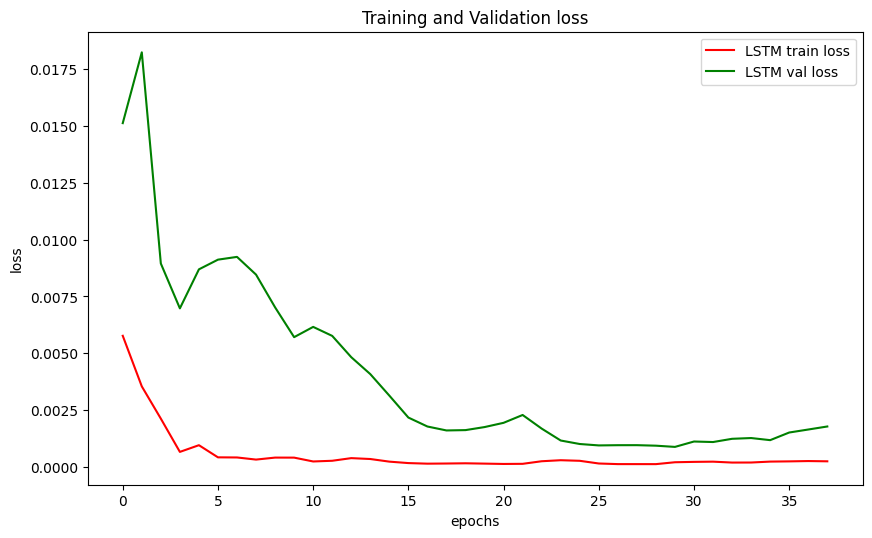

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(history_lstm.history['loss'], label='LSTM train loss', color='red')
plt.plot(history_lstm.history['val_loss'], label='LSTM val loss', color= 'green')
# plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
# plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

In [ ]:
y_pred = model_lstm.predict(X_test)

NameError: ignored

In [ ]:
print(y_test.shape,y_pred.shape)

(1059,) (1059, 1)


In [ ]:
import numpy as np
np.isnan(y_test)

array([False, False, False, ..., False, False, False])

In [ ]:
def invTransform(scaler, data):
    dummy = pd.DataFrame(np.zeros((len(data), 34)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values

In [ ]:
y_pred.shape

(1059, 1)

In [ ]:
y_pred = invTransform(scaler, y_pred)
y_test = invTransform(scaler, y_test)

In [ ]:
y_pred, y_test

(array([ 8056.35594688,  8098.99564321,  8134.05998648, ...,
        13272.74630235, 13320.33855058, 13360.1856489 ]),
 array([ 8179.5       ,  8192.25      ,  8190.5       , ...,
        14873.8       , 14834.85      ,  5528.18453326]))

In [ ]:
mean_y_test = y_test.mean()
mean_y_pred = y_pred.mean()
print(mean_y_test, mean_y_pred)

10979.36320541384 10572.738264826123


In [ ]:
accuracy = round((mean_y_test / mean_y_pred)*100,2)
accuracy

103.85

In [ ]:
from math import sqrt
m = len(y_pred)
rmse = sqrt(mean_squared_error(y_pred,y_test,squared=False))

#RMSE


In [ ]:
rmse

24.69655648313222

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

#MAE

In [ ]:
mae

array([437.75565153])

# R2

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print(r2)

0.8204174449595754


In [ ]:
y_train_pred = model_lstm.predict(X_train)
print(y_train.shape,y_train_pred.shape)


(4174,) (4174, 1)


In [ ]:
import numpy as np
np.isnan(y_train)


array([False, False, False, ..., False, False, False])

In [ ]:
y_train_pred.shape

(4174, 1)

In [ ]:
y_train = invTransform(scaler,y_train)
y_train_pred = invTransform(scaler, y_train_pred)

In [ ]:
from math import sqrt
m = len(y_train_pred)
rmse = sqrt(mean_squared_error(y_train_pred,y_train,squared=False))
rmse

8370.342471031501

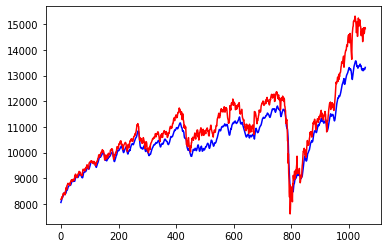

In [ ]:
# y_pred[2]
# plt.plot(y_test)
# y_pred = y_pred.reshape(1059,60)
# print(type(y_pred[:-2]))
# print(y_pred[:,0,-2].shape)
plt.plot(y_pred[:-1], c='b')
plt.plot(y_test[:-1], c='r')


# Adjusted R2

In [ ]:
n = 2518
p = 14
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2)

0.8194129879997009


RMSE of training data: 3.6755
RMSE of testing data: 4.5184

In [ ]:
# results = pd.read_csv('/content/gdrive/MyDrive/results.csv', index_col=[0])

In [ ]:
# results.describe()

In [ ]:
# len(y_pred)

In [ ]:
ypred = {"sti_global20": y_pred}

In [ ]:
ypred

{'sti_global20': array([ 8056.35594688,  8098.99564321,  8134.05998648, ...,
        13272.74630235, 13320.33855058, 13360.1856489 ])}

In [ ]:
# testdf = results.join(pd.DataFrame(ypred))

In [ ]:
testdf = pd.DataFrame(ypred)

In [ ]:
testdf.to_csv('/content/gdrive/MyDrive/sti_global20.csv');